# 1. TRIMODAL SETUP

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(10)

#### Import experiment data 

In [3]:
from DATA import NARMA10

data = NARMA10(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [4]:
N_UNITS = 250

In [5]:

from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.9, ro_rescale=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## TRIMODAL APPROACH

In [6]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 
from IPReservoir import IPReservoir

half_trimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.trimodal(N_UNITS, 0.5), bias = False)

half_trimodal_reservoir.W_x = W_x
half_trimodal_reservoir.W_u = W_u
#trimodal_reservoir.b_x = b_x
#trimodal_reservoir.b_u = b_u



In [7]:
half_trimodal_reservoir.mask.areAllGaussian

True

In [21]:
half_trimodal_reservoir.pre_train(X_TR, eta= 0.00000015, epochs=5,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 534.8770141601562.
- Epoch: 2) | KL Divergence value: 550.689208984375.
- Epoch: 3) | KL Divergence value: 567.8038330078125.
- Epoch: 4) | KL Divergence value: 586.2098388671875.
- Epoch: 5) | KL Divergence value: 605.9046020507812.


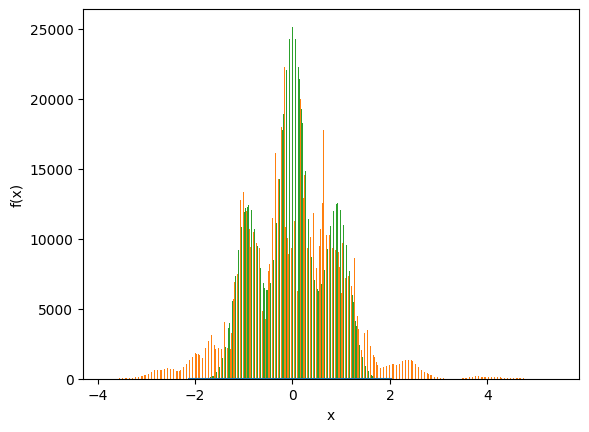

In [22]:
half_trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
half_trimodal_reservoir.plot_global_neural_activity()

In [10]:

half_trimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.2335374355316162)  ACTUAL_STD == (0.07225003093481064)][ TARGET_MEAN == (-0.0026556039229035378) TARGET_STD == (0.2499392032623291)]
Unit - (2): [ ACTUAL_MEAN == (0.11661537736654282)  ACTUAL_STD == (0.03123384714126587)][ TARGET_MEAN == (0.0010005332296714187) TARGET_STD == (0.2507246136665344)]
Overall network: [ACTUAL_MEAN == (0.0042577884159982204)  ACTUAL_STD == (0.23072142899036407)]


## CHAOTIC TRIMODAL

In [53]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 
from IPReservoir import IPReservoir

chaotic_trimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.trimodal(N_UNITS, 0.66), bias = False)

chaotic_trimodal_reservoir.W_x = W_x
chaotic_trimodal_reservoir.W_u = W_u
#trimodal_reservoir.b_x = b_x
#trimodal_reservoir.b_u = b_u



In [54]:
chaotic_trimodal_reservoir.mask.areAllGaussian

True

In [65]:
chaotic_trimodal_reservoir.pre_train(X_TR, eta= 0.00000015, epochs=5,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 486.7304992675781.
- Epoch: 2) | KL Divergence value: 494.43121337890625.
- Epoch: 3) | KL Divergence value: 503.49261474609375.
- Epoch: 4) | KL Divergence value: 513.9004516601562.
- Epoch: 5) | KL Divergence value: 525.6366577148438.


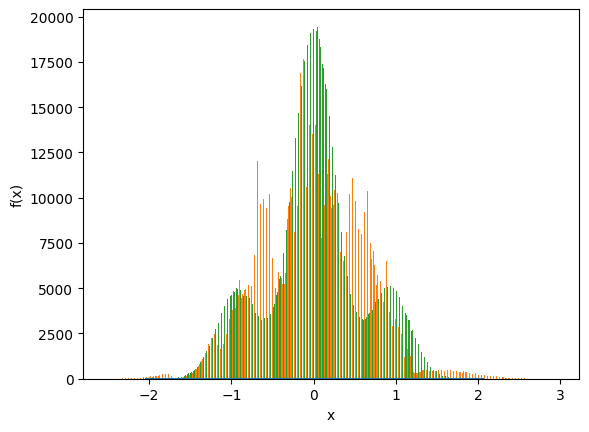

In [66]:
chaotic_trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
chaotic_trimodal_reservoir.plot_global_neural_activity()

In [52]:

chaotic_trimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.20899458229541779)  ACTUAL_STD == (0.0717412680387497)][ TARGET_MEAN == (-0.0012397883692756295) TARGET_STD == (0.24692095816135406)]
Unit - (2): [ ACTUAL_MEAN == (0.10704999417066574)  ACTUAL_STD == (0.0311104916036129)][ TARGET_MEAN == (0.0013367297360673547) TARGET_STD == (0.25103652477264404)]
Overall network: [ACTUAL_MEAN == (0.003658141940832138)  ACTUAL_STD == (0.18831485509872437)]


## EQUALLY TRIMODAL

In [25]:
from ESN import EchoStateNetwork

equally_trimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.trimodal(N_UNITS, 0.33), bias = False)

equally_trimodal_reservoir.W_x = W_x
equally_trimodal_reservoir.W_u = W_u

In [39]:
equally_trimodal_reservoir.pre_train(X_TR, eta= 0.00000005, epochs=5,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 422.3516540527344.
- Epoch: 2) | KL Divergence value: 423.68756103515625.
- Epoch: 3) | KL Divergence value: 425.19549560546875.
- Epoch: 4) | KL Divergence value: 426.8739929199219.
- Epoch: 5) | KL Divergence value: 428.72052001953125.


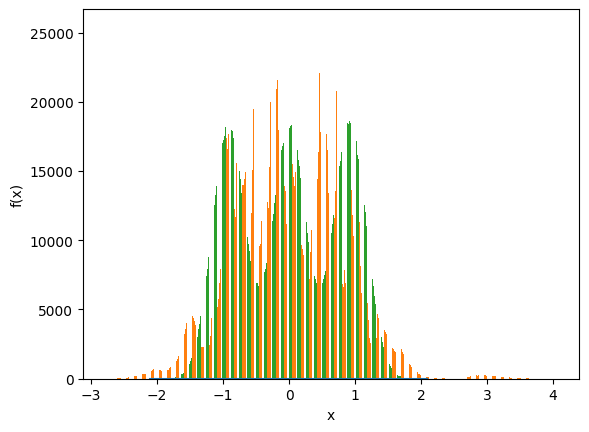

In [40]:
equally_trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
equally_trimodal_reservoir.plot_global_neural_activity()

In [41]:
equally_trimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.6671456694602966)  ACTUAL_STD == (0.08149563521146774)][ TARGET_MEAN == (-0.0005440848763100803) TARGET_STD == (0.24740074574947357)]
Unit - (2): [ ACTUAL_MEAN == (0.38916143774986267)  ACTUAL_STD == (0.03301725909113884)][ TARGET_MEAN == (0.006446124520152807) TARGET_STD == (0.2503928244113922)]
Overall network: [ACTUAL_MEAN == (0.003918509464710951)  ACTUAL_STD == (0.8136441111564636)]


### COMPARISON ON TEST DATA

In [43]:
from Metrics import NRMSE, MSE
from ESN import EchoStateNetwork

half_trimodal_esn = EchoStateNetwork(half_trimodal_reservoir)
equally_trimodal_esn = EchoStateNetwork(equally_trimodal_reservoir)


half_trimodal_esn.reservoir.reset_initial_state()
equally_trimodal_esn.reservoir.reset_initial_state()


half_trimodal_esn.reservoir.warm_up(X_TR[0:100])
equally_trimodal_esn.reservoir.warm_up(X_TR[0:100])


half_trimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)
equally_trimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02085602817521337


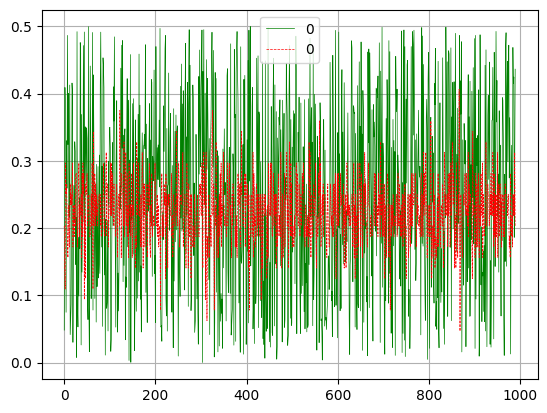

In [44]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { half_trimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022426003624185512


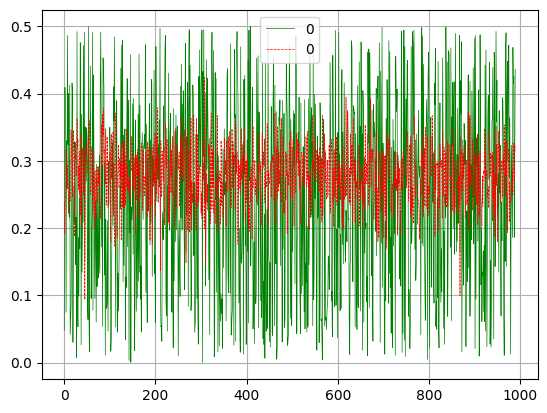

In [45]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { equally_trimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

## MEMORY CAPACITY

In [46]:
half_trimodal_esn.MemoryCapacity(1000,0)

tensor(9.5418)

In [47]:
equally_trimodal_esn.MemoryCapacity(1000,0)

tensor(27.6079)

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02063894790074999
tensor(34.3266)


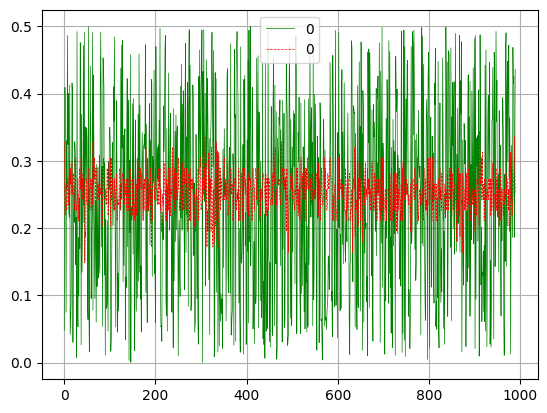

In [67]:
chaotic_trimodal_esn = EchoStateNetwork(chaotic_trimodal_reservoir)
chaotic_trimodal_esn.reservoir.reset_initial_state()
chaotic_trimodal_esn.reservoir.warm_up(X_TR[0:100])
chaotic_trimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { chaotic_trimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )
print(chaotic_trimodal_esn.MemoryCapacity(1000,0))

